# Описание проекта

В данном задании будем работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Нам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.

Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [526]:
data_train = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [527]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [528]:
df = data_train

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [529]:
df.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

**Обработка поля title**

In [530]:
df['title'].value_counts()

title
Ser                  306
Maester               29
Archmaester           21
Lord                  19
Septon                16
                    ... 
Lord of Hellholt       1
Red Flower Vale        1
Lord of Harrenhal      1
Rain House             1
Highgarden             1
Name: count, Length: 195, dtype: int64

In [531]:
df['title'] = np.where(df['title'].isna(), 0, 1)

In [532]:
df['title'].value_counts()

title
0    840
1    717
Name: count, dtype: int64

**Обработка поля house**

In [533]:
df['house'] = df['house'].fillna('Unknown')

In [534]:
sorted(df['house'].unique())

["Alchemists' Guild",
 'Antler Men',
 'Band of Nine',
 'Black Ears',
 'Blacks',
 'Brave Companions',
 'Brotherhood Without Banners',
 'Brotherhood without banners',
 'Burned Men',
 "Chataya's brothel",
 'Citadel',
 "City Watch of King's Landing",
 'Company of the Cat',
 'Drowned men',
 'Faceless Men',
 'Faith of the Seven',
 'Golden Company',
 'Good Masters',
 'Happy Port',
 'House Allyrion',
 'House Ambrose',
 'House Arryn',
 'House Ashford',
 'House Baelish',
 'House Ball',
 'House Banefort',
 'House Bar Emmon',
 'House Baratheon',
 'House Baratheon of Dragonstone',
 "House Baratheon of King's Landing",
 'House Beesbury',
 'House Belmore',
 'House Bettley',
 'House Blackbar',
 'House Blackberry',
 'House Blackfyre',
 'House Blackmont',
 'House Blacktyde',
 'House Blackwood',
 'House Blanetree',
 'House Blount',
 'House Boggs',
 'House Bolling',
 'House Bolton',
 'House Borrell',
 'House Botley',
 'House Bracken',
 'House Brax',
 'House Broom',
 'House Brune of Brownhollow',
 'House B

In [535]:
df['house'] = df['house'].str.replace('House of ', 'House ', regex=True)

In [536]:
import re

def shorten_name(house_name):
    match = re.match(r'(House \w+)', house_name)
    if match:
        return match.group(1)
    return house_name

df['house'] = df['house'].apply(shorten_name)

In [537]:
value_counts = df['house'].value_counts()
threshold = 0
df['house'] = df['house'].apply(lambda x: 'Other' if value_counts[x] <= threshold else x)

In [538]:
sorted(df['house'].unique())

["Alchemists' Guild",
 'Antler Men',
 'Band of Nine',
 'Black Ears',
 'Blacks',
 'Brave Companions',
 'Brotherhood Without Banners',
 'Brotherhood without banners',
 'Burned Men',
 "Chataya's brothel",
 'Citadel',
 "City Watch of King's Landing",
 'Company of the Cat',
 'Drowned men',
 'Faceless Men',
 'Faith of the Seven',
 'Golden Company',
 'Good Masters',
 'Happy Port',
 'House Allyrion',
 'House Ambrose',
 'House Arryn',
 'House Ashford',
 'House Baelish',
 'House Ball',
 'House Banefort',
 'House Bar',
 'House Baratheon',
 'House Beesbury',
 'House Belmore',
 'House Bettley',
 'House Blackbar',
 'House Blackberry',
 'House Blackfyre',
 'House Blackmont',
 'House Blacktyde',
 'House Blackwood',
 'House Blanetree',
 'House Blount',
 'House Boggs',
 'House Bolling',
 'House Bolton',
 'House Borrell',
 'House Botley',
 'House Bracken',
 'House Brax',
 'House Broom',
 'House Brune',
 'House Buckler',
 'House Bulwer',
 'House Bushy',
 'House Butterwell',
 'House Byrch',
 'House Caffere

**Обработка поля age**

In [539]:
group_means = df.groupby(['culture', 'male'])['age'].transform('mean')
df['age'] = df['age'].fillna(group_means)

In [540]:
group_means = df.groupby('male')['age'].transform('mean')
df['age'] = df['age'].fillna(group_means)

In [541]:
df['age'].isna().sum()

np.int64(0)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [542]:
df['isPopular'] = df['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
df['isPopular']

S.No
1       1
2       1
3       0
4       0
5       0
       ..
1553    0
1554    0
1555    0
1556    0
1557    0
Name: isPopular, Length: 1557, dtype: int64

In [543]:
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x >= 1 else 0)
df['boolDeadRelations']

S.No
1       1
2       1
3       0
4       0
5       0
       ..
1553    0
1554    0
1555    0
1556    0
1557    0
Name: boolDeadRelations, Length: 1557, dtype: int64

In [544]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [545]:
df['culture'] = df['culture'].fillna('Unknown')

mapping = {synonym: category for category, synonyms in cult.items() for synonym in synonyms}

def map_category(value):
    return mapping.get(value.lower(), 'Unknown')

df['culture'] = df['culture'].apply(map_category)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [546]:
df = df.drop(['name', 'mother', 'father', 'heir', 'spouse', 'dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'house'], axis=1)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [547]:
df['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

**Задание 1.7.** Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.

In [548]:
df = pd.get_dummies(df, drop_first=True)

**Задание 1.8.** Проанализируйте признаки.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?
  * Проанализируйте влияние признаков на целевую переменную.

<Axes: >

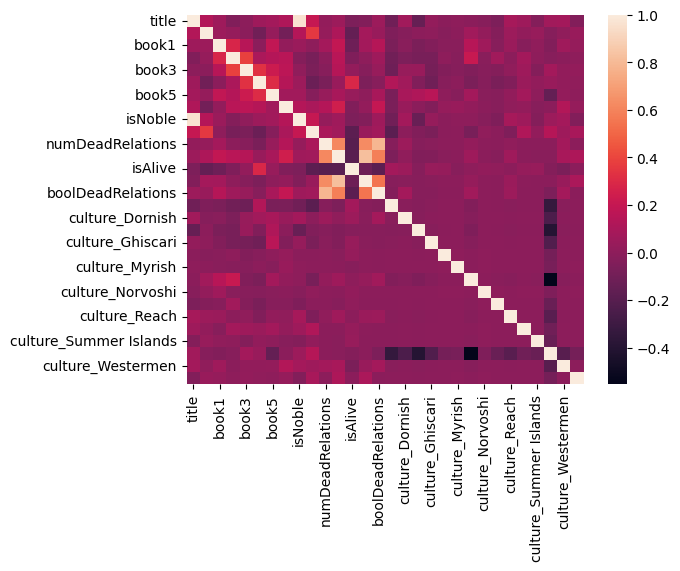

In [549]:
sns.heatmap(df.corr(numeric_only=True))

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [550]:
X = df.drop('isAlive', axis=1)
y = df['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [551]:
from sklearn.model_selection import train_test_split

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [553]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [554]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [555]:
predictions = {}

In [556]:
# Шаг 1. создание модели
lr = LogisticRegression(C=1, max_iter=1000)  

# Шаг 2. обучение модели
lr.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = lr.predict(X_test)
predictions['lr'] = y_pred

In [557]:
# Шаг 1. создание модели
ada = AdaBoostClassifier()  

# Шаг 2. обучение модели
ada.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada.predict(X_test)
predictions['ada'] = y_pred

In [558]:
# Шаг 1. создание модели
rf = RandomForestClassifier()  

# Шаг 2. обучение модели
rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = rf.predict(X_test)
predictions['rf'] = y_pred

In [559]:
# Шаг 1. создание модели
gp = GaussianProcessClassifier()  

# Шаг 2. обучение модели
gp.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gp.predict(X_test)
predictions['gp'] = y_pred

In [560]:
# Шаг 1. создание модели
gnb = GaussianNB()  

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gnb.predict(X_test)
predictions['gnb'] = y_pred

In [561]:
# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors=2)  

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)
predictions['knn'] = y_pred

In [562]:
# Шаг 1. создание модели
svm = SVC()  

# Шаг 2. обучение модели
svm.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = svm.predict(X_test)
predictions['svm'] = y_pred

In [563]:
# Шаг 1. создание модели
dt = DecisionTreeClassifier()  

# Шаг 2. обучение модели
dt.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = dt.predict(X_test)
predictions['dt'] = y_pred

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [564]:
from sklearn.metrics import accuracy_score

In [565]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['lr'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7795


In [566]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['ada'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8000


In [567]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['rf'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7872


In [568]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['gp'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7846


In [569]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['gnb'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.2974


In [570]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['knn'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6872


In [571]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['svm'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7667


In [572]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, predictions['dt'])
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7436


Выберите лучшую модель.
**Random Forest**

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [573]:
df_train = df
df = data_test

df['title'] = np.where(df['title'].isna(), 0, 1)

df['house'] = df['house'].fillna('Unknown')
df['house'] = df['house'].str.replace('House of ', 'House ', regex=True)

def shorten_name(house_name):
    match = re.match(r'(House \w+)', house_name)
    if match:
        return match.group(1)
    return house_name

df['house'] = df['house'].apply(shorten_name)
value_counts = df['house'].value_counts()
threshold = 0
df['house'] = df['house'].apply(lambda x: 'Other' if value_counts[x] <= threshold else x)

group_means = df.groupby(['culture', 'male'])['age'].transform('mean')
df['age'] = df['age'].fillna(group_means)
group_means = df.groupby('male')['age'].transform('mean')
df['age'] = df['age'].fillna(group_means)

df['isPopular'] = df['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)

df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x >= 1 else 0)

df['culture'] = df['culture'].fillna('Unknown')

mapping = {synonym: category for category, synonyms in cult.items() for synonym in synonyms}

def map_category(value):
    return mapping.get(value.lower(), 'Unknown')

df['culture'] = df['culture'].apply(map_category)

df = df.drop(['name', 'mother', 'father', 'heir', 'spouse', 'dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'house'], axis=1)

df = pd.get_dummies(df, drop_first=True)

X_main_test = df

In [574]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [575]:
submission['isAlive'] = rf.predict(X_main_test)
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [576]:
submission.to_csv("new_submission.csv", index=False)

## Часть 4. Улучшение модели

In [587]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': range(50, 301, 25), 'max_depth': range(3, 16)}
gs = GridSearchCV(RandomForestClassifier(), params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
gs.fit(X, y)
gs.best_estimator_

Fitting 5 folds for each of 143 candidates, totalling 715 fits


RandomForestClassifier(max_depth=10, n_estimators=200)

In [588]:
submission['isAlive'] = gs.predict(X_main_test)
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [589]:
submission.to_csv("new_submission.csv", index=False)

In [608]:
from lightgbm import LGBMClassifier

params = {'n_estimators': range(50, 501, 25), 'learning_rate': np.arange(0.01, 1, 0.1)}
gs = GridSearchCV(LGBMClassifier(), params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
gs.fit(X, y)
gs.best_estimator_

Fitting 5 folds for each of 190 candidates, totalling 950 fits


LGBMClassifier(learning_rate=np.float64(0.01), n_estimators=150)

In [611]:
submission['isAlive'] = gs.predict(X_main_test)
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [612]:
submission.to_csv("new_submission.csv", index=False)